In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob

## Concatenate tha train values and the labels

In [ ]:
train_values=pd.read_csv('train_values.csv')
train_labels=pd.read_csv('train_labels.csv')
train_labels=train_labels.drop('building_id',axis=1)
data = pd.concat([train_values,train_labels], axis=1)
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


## Check the data balance

In [ ]:
data['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

## Data Exploration

In [ ]:
data.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

### Check for missing values

In [ ]:
data.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

### Check for duplicates

In [ ]:
data.duplicated().sum()

0

## Data Visualization

### Pie Chart of the label before oversampling

([<matplotlib.patches.Wedge at 0x7fa4e22fadd0>,
 [Text(-1.0744117631929584, -0.23587997607384653, '2'),
  Text(1.0959144221394685, -0.09471842136941964, '3'),
  Text(0.3275189825647045, 1.050110144727581, '1')],
 [Text(-0.5860427799234318, -0.128661805131189, '56.9%'),
  Text(0.5977715029851646, -0.051664593474228894, '33.5%'),
  Text(0.1786467177625661, 0.5727873516695895, '9.6%')])

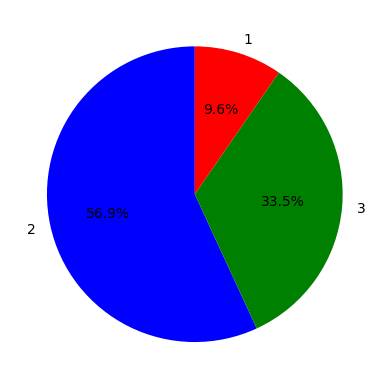

In [ ]:
label_counts = data['damage_grade'].value_counts()
labels = label_counts.index.tolist()
sizes = label_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red'])

In [ ]:
#plt.figure(figsize=(10,6))
#sns.set(font_scale=1)
#plt.hist(data['damage_grade'],bins=3,histtype='bar',rwidth=5)
#plt.title('Before oversampling: Histogram of damage_range')
#plt.xlabel('Damage_range')
#plt.ylabel('frequency')
#plt.show()

### Heatmap of the data correlation

<ipython-input-37-03845eccb649>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

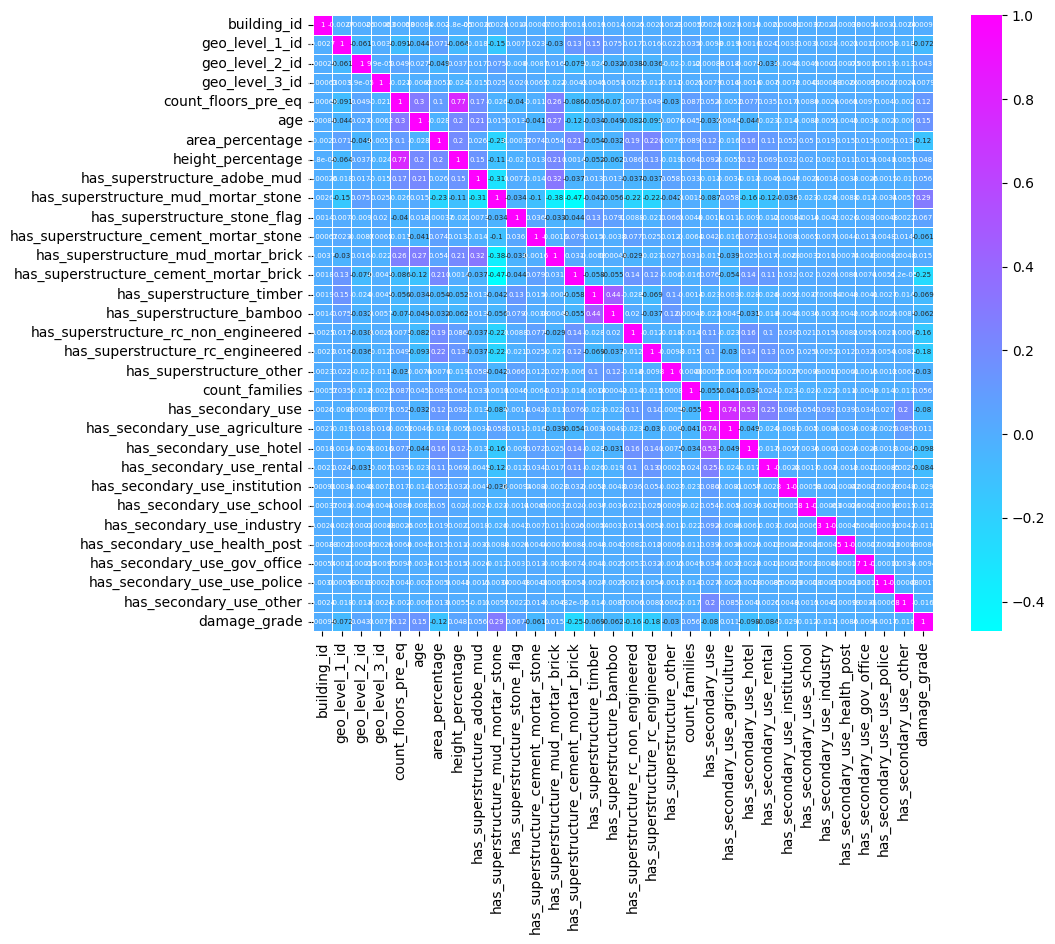

In [ ]:
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr,cmap='cool',linewidth=.5,annot_kws={"size": 5},annot=True)

In [ ]:
categorical_features = [i for i in data.columns if data[i].dtypes == 'O']
categorical_features

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

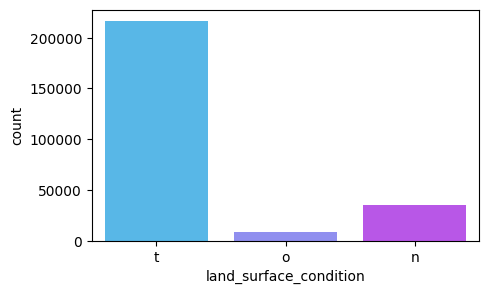

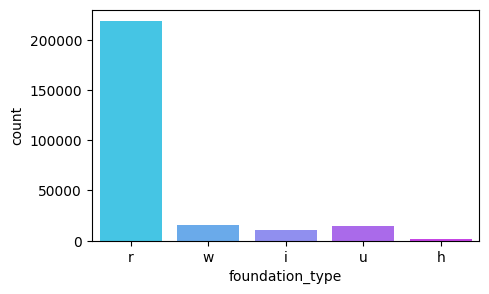

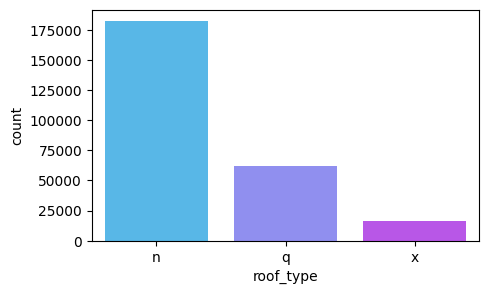

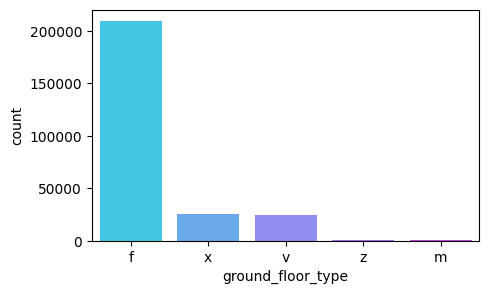

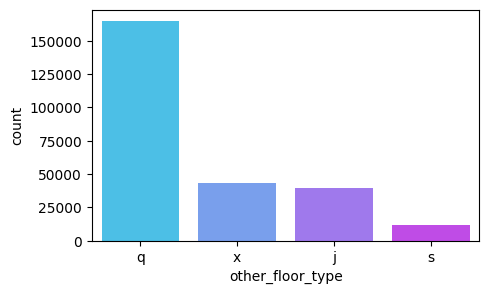

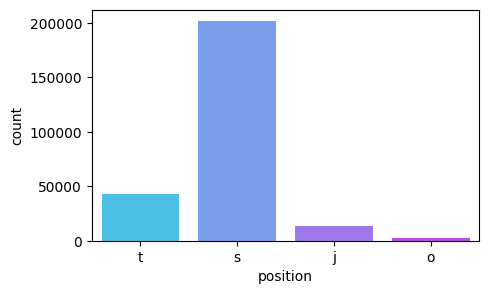

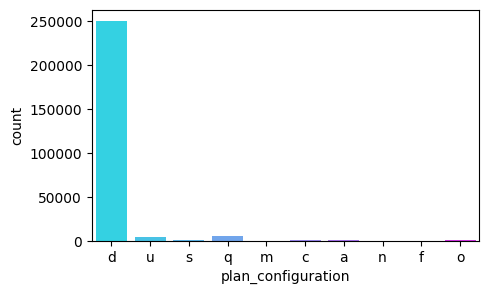

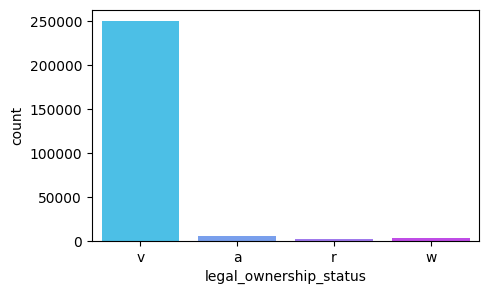

In [ ]:
for i in categorical_features:
  plt.figure(figsize=(5,3))
  sns.countplot(x=i, data=data, palette='cool')

## Scatter Plot: Relation between the age of the building and the damage_grade

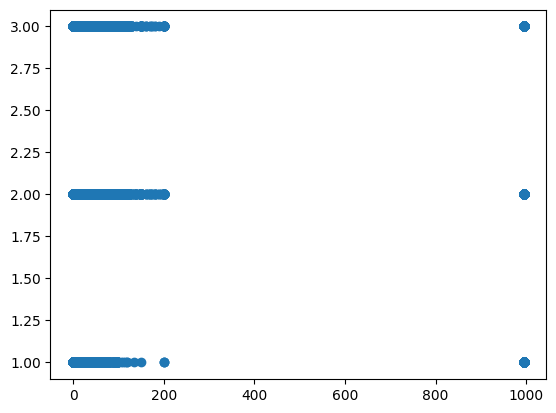

In [ ]:
plt.scatter(data = data, x = 'age', y = 'damage_grade')

## Scatter Plot: Relation between buildings withe age>400 years and the damage_grade

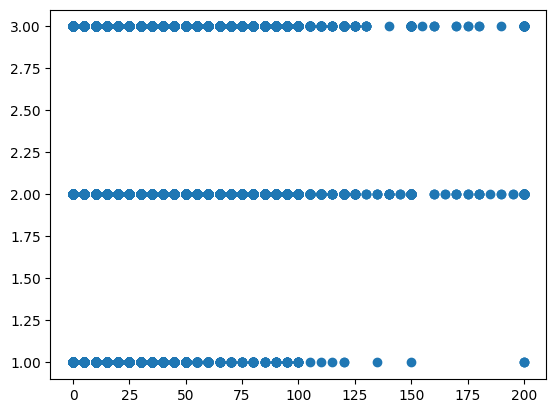

In [ ]:
data = data.drop(data[data['age']>400].index)
plt.scatter(data = data, x = 'age', y = 'damage_grade')

## Data Preprocessing

### Check for categorical values

In [ ]:
data.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

### One Hot Encoding for categorical values

## One hot encoding for "land_surface_condition"

In [ ]:
data['land_surface_condition'].unique()

array(['t', 'o', 'n'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
Land_data = data['land_surface_condition'].values.reshape(-1, 1)
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(Land_data).toarray()
one_hot_df_land = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['land_surface_condition']))
#encoded_data = pd.concat([data, one_hot_df], axis=1)
#encoded_data.head()

## One hot encoding for "foundation_type"



In [ ]:
data['foundation_type'].unique()

array(['r', 'w', 'i', 'u', 'h'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
foundation_data = data['foundation_type'].values.reshape(-1, 1)
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(foundation_data).toarray()
one_hot_df_foundation = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['foundation_type']))
#encoded_data = pd.concat([data, one_hot_df], axis=1)
#encoded_data.head()

## One hot encoding for "roof_type"

In [ ]:
data['roof_type'].unique()

array(['n', 'q', 'x'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
Roof_data = data['roof_type'].values.reshape(-1, 1)
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(Roof_data).toarray()
one_hot_df_roof = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['roof_type']))
#encoded_data = pd.concat([data, one_hot_df], axis=1)
#encoded_data.head()

## One hot encoding for "ground_floor_type"

In [ ]:
data['ground_floor_type'].unique()

array(['f', 'x', 'v', 'z', 'm'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
groundfloor_data = data['ground_floor_type'].values.reshape(-1, 1)
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(groundfloor_data).toarray()
one_hot_df_groundfloor = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['ground_floor_type']))
#encoded_data = pd.concat([data, one_hot_df], axis=1)
#encoded_data.head()


## One hot encoding for "other_floor_type"

In [ ]:
data['other_floor_type'].unique()

array(['q', 'x', 'j', 's'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
otherfloor_data = data['other_floor_type'].values.reshape(-1, 1)
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(otherfloor_data).toarray()
one_hot_df_otherfloor = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['other_floor_type']))
#encoded_data = pd.concat([data, one_hot_df], axis=1)
#encoded_data.head()

## One hot encoding for "position"

In [ ]:
data['position'].unique()

array(['t', 's', 'j', 'o'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
position_data = data['position'].values.reshape(-1, 1)
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(position_data).toarray()
one_hot_df_position = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['position']))
#encoded_data = pd.concat([data, one_hot_df], axis=1)
#encoded_data.head()

## One hot encoding for "plan_configuration"

In [ ]:
data['plan_configuration'].unique()

array(['d', 'u', 's', 'q', 'm', 'c', 'a', 'n', 'f', 'o'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
plan_data = data['plan_configuration'].values.reshape(-1, 1)
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(plan_data).toarray()
one_hot_df_plan = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['plan_configuration']))
#encoded_data = pd.concat([data, one_hot_df], axis=1)
#encoded_data.head()

## One hot encoding for "legal_ownership_status"

In [ ]:
data['legal_ownership_status'].unique()

array(['v', 'a', 'r', 'w'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
legal_data = data['legal_ownership_status'].values.reshape(-1, 1)
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(legal_data).toarray()
one_hot_df_legal = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['legal_ownership_status']))
#encoded_data = pd.concat([data, one_hot_df], axis=1)
#encoded_data.head()

## Concat all the one hot encoded features into one dataframe and drop all the features with dtypes='Object'

In [ ]:
encoded_data = pd.concat([data, one_hot_df_land,one_hot_df_foundation,one_hot_df_roof,one_hot_df_groundfloor,
                          one_hot_df_otherfloor,one_hot_df_position,one_hot_df_plan,one_hot_df_legal],axis=1)
encoded_data=encoded_data.drop(['land_surface_condition','foundation_type','roof_type','ground_floor_type',
                               'other_floor_type','position','plan_configuration','legal_ownership_status'],axis=1)
encoded_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28830,8,900,2812,2,10,8,7,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,94947,21,363,8973,2,10,5,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,590882,22,418,10694,2,10,6,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,201944,11,131,1488,3,30,8,9,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Check if there are any remaining categorical values

In [ ]:
encoded_data.dtypes

building_id                 float64
geo_level_1_id              float64
geo_level_2_id              float64
geo_level_3_id              float64
count_floors_pre_eq         float64
                             ...   
plan_configuration_u        float64
legal_ownership_status_a    float64
legal_ownership_status_r    float64
legal_ownership_status_v    float64
legal_ownership_status_w    float64
Length: 70, dtype: object

### Split the data into train & test

In [ ]:
X=encoded_data.drop('damage_grade',axis=1)
y=encoded_data['damage_grade']
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

### Apply oversampling

In [ ]:
smote=SMOTE()
x_over,y_over=smote.fit_resample(x_train,y_train)

## Pie Chart after Oversampling

([<matplotlib.patches.Wedge at 0x7fa4e1dde260>,
 [Text(-0.9526279613277876, 0.5499999702695114, '3'),
  Text(1.0298943251329445e-07, -1.0999999999999954, '2'),
  Text(0.9526278583383436, 0.5500001486524351, '1')],
 [Text(-0.5196152516333387, 0.29999998378336984, '33.3%'),
  Text(5.61760540981606e-08, -0.5999999999999974, '33.3%'),
  Text(0.5196151954572783, 0.3000000810831464, '33.3%')])

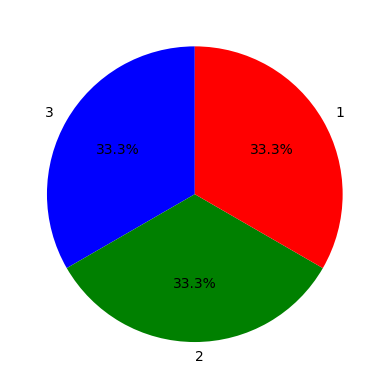

In [ ]:
label_counts = y_over.value_counts()
labels = label_counts.index.tolist()
sizes = label_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red'])  # Specify colors if desired

## Split the data into train & test after oversampling

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x_over, y_over, test_size=0.1, random_state=42)

In [ ]:
y_over.value_counts()

3    133466
2    133466
1    133466
Name: damage_grade, dtype: int64

## Decision Tree Classifier

### Apply decision tree with parameters: max_depth=10

In [ ]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
model1 = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=200)

In [ ]:
model1.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=200)

In [ ]:
from sklearn.metrics import f1_score
y_pred = model1.predict(x_test)
print('Decision Tree Classifier \n')
#print(f'Accuracy for test set = {accuracy_score(y_test,y_pred)*100} % \n')
#print(classification_report(y_test,y_pred))
print('Micro F1 score: ',f1_score(y_test, y_pred, average='micro'))

Decision Tree Classifier 

Micro F1 score:  0.736063936063936


## Save Model1 to the drive

In [ ]:
ABS_PATH = '/content/drive/My Drive/Colab Notebooks/datamining/'
DATA_PATH = os.path.join(ABS_PATH, 'data')

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model1.sav')
joblib.dump(model1, SVM_PATH)

['/content/drive/My Drive/Colab Notebooks/datamining/data/model1.sav']

### Apply decision tree with parameters:max_depth=15,criterion='entropy'



In [ ]:
model1_1 = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=15,criterion='entropy'),n_estimators=200)

In [ ]:
model1_1.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=15),
                  n_estimators=200)

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model1_1.sav')
model1_1 = joblib.load(SVM_PATH)
#predict_test=model3_1.predict(normalized_encodings)

In [ ]:
from sklearn.metrics import f1_score
y_pred_1 = model1_1.predict(x_test)
print('Decision Tree Classifier \n')
#print(f'Accuracy for test set = {accuracy_score(y_test,y_pred_1)*100} % \n')
#print(classification_report(y_test,y_pred_1))
print('Micro F1 score: ',f1_score(y_test, y_pred_1, average='micro'))

Decision Tree Classifier 

Micro F1 score:  0.7749000999000999


## Save Model1_1 to the drive

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model1_1.sav')
joblib.dump(model1_1, SVM_PATH)

['/content/drive/My Drive/Colab Notebooks/datamining/data/model1_1.sav']

### Apply decision tree with parameters:max_depth=25,criterion='log_loss',splitter='random'

In [ ]:
model1_2 = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=25,criterion='log_loss',splitter='random'),n_estimators=200)

In [ ]:
model1_2.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='log_loss',
                                                   max_depth=25,
                                                   splitter='random'),
                  n_estimators=200)

In [ ]:
from sklearn.metrics import f1_score
y_pred_2 = model1_2.predict(x_test)
print('Decision Tree Classifier \n')
print(f'Accuracy for test set = {accuracy_score(y_test,y_pred_2)*100} % \n')
print(classification_report(y_test,y_pred_2))
print('Micro F1 score: ',f1_score(y_test, y_pred_2, average='micro'))

Decision Tree Classifier 

Accuracy for test set = 79.45054945054945 % 

              precision    recall  f1-score   support

           1       0.91      0.85      0.88     13115
           2       0.72      0.80      0.76     13418
           3       0.77      0.74      0.75     13507

    accuracy                           0.79     40040
   macro avg       0.80      0.80      0.80     40040
weighted avg       0.80      0.79      0.80     40040

Micro F1 score:  0.7945054945054945


## Save Model1_2 to the drive

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model1_2.sav')
joblib.dump(model1_2, SVM_PATH)

['/content/drive/My Drive/Colab Notebooks/datamining/data/model1_2.sav']

## Random Forest Classifier

### Apply Random Forest with parameters:n_estimators=100

In [ ]:
model2 = RandomForestClassifier(n_estimators=100)

In [ ]:
model2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model2.sav')
model2 = joblib.load(SVM_PATH)
#predict_test=model3_1.predict(normalized_encodings)

In [ ]:
from sklearn.metrics import f1_score
y_pred2 = model2.predict(x_test)
print('Random Forest Classifier \n')
print(f'Accuracy for test set = {accuracy_score(y_test,y_pred2)*100} % \n')
print(classification_report(y_test,y_pred2))
print('Micro F1 score: ',f1_score(y_test, y_pred2, average='micro'))

Random Forest Classifier 

Accuracy for test set = 79.97252747252747 % 

              precision    recall  f1-score   support

           1       0.92      0.86      0.89     13115
           2       0.71      0.82      0.76     13418
           3       0.79      0.72      0.75     13507

    accuracy                           0.80     40040
   macro avg       0.81      0.80      0.80     40040
weighted avg       0.81      0.80      0.80     40040

Micro F1 score:  0.7997252747252748


## Save Model2 to the drive

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model2.sav')
joblib.dump(model2, SVM_PATH)

['/content/drive/My Drive/Colab Notebooks/datamining/data/model2.sav']

### Apply Random Forest with parameters:n_estimators=150,criterion='log_loss',class_weight='balanced'

In [ ]:
model2_1 = RandomForestClassifier(n_estimators=150,criterion='log_loss',class_weight='balanced')

In [ ]:
model2_1.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       n_estimators=150, random_state=42)

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model2_1.sav')
model2_1 = joblib.load(SVM_PATH)
#predict_test=model3_1.predict(normalized_encodings)

In [ ]:
from sklearn.metrics import f1_score
y_pred2_1 = model2_1.predict(x_test)
print('Random Forest \n')
#print(f'Accuracy for test set = {accuracy_score(y_test,y_pred2_1)*100} % \n')
#print(classification_report(y_test,y_pred2_1))
print('Micro F1 score: ',f1_score(y_test, y_pred2_1, average='micro'))

Random Forest 

Accuracy for test set = 71.38252561298492 % 

              precision    recall  f1-score   support

           1       0.67      0.45      0.54      2546
           2       0.71      0.85      0.77     14793
           3       0.73      0.56      0.64      8722

    accuracy                           0.71     26061
   macro avg       0.71      0.62      0.65     26061
weighted avg       0.71      0.71      0.70     26061

Micro F1 score:  0.7138252561298492


## Save Model2_1 to the drive

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model2_1.sav')
joblib.dump(model2_1, SVM_PATH)

['/content/drive/My Drive/Colab Notebooks/datamining/data/model2_1.sav']

### Apply Random Forest with parameters:n_estimators=100,criterion='entropy',class_weight='balanced',random_state=20

In [ ]:
model2_2 = RandomForestClassifier(n_estimators=100,criterion='entropy',class_weight='balanced',random_state=20)
model2_2.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=20)

In [ ]:
from sklearn.metrics import f1_score
y_pred2_2 = model2_2.predict(x_test)
print('Random Forest \n')
print(f'Accuracy for test set = {accuracy_score(y_test,y_pred2_2)*100} % \n')
print(classification_report(y_test,y_pred2_2))
print('Micro F1 score: ',f1_score(y_test, y_pred2_2, average='micro'))

Random Forest 

Accuracy for test set = 79.81268731268732 % 

              precision    recall  f1-score   support

           1       0.92      0.86      0.89     13115
           2       0.71      0.82      0.76     13418
           3       0.79      0.72      0.75     13507

    accuracy                           0.80     40040
   macro avg       0.81      0.80      0.80     40040
weighted avg       0.80      0.80      0.80     40040

Micro F1 score:  0.7981268731268731


## Save Model2_2 to the drive

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model2_2.sav')
joblib.dump(model2_2, SVM_PATH)

['/content/drive/My Drive/Colab Notebooks/datamining/data/model2_2.sav']

## Normalizing train data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your data is stored in a 2D array or DataFrame called 'data'

# Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(x_train)

## Normalizing test data

In [ ]:
scaler_test = MinMaxScaler()
normalized_test = scaler.fit_transform(x_test)

## GradientBoost Classifier

### Apply GradientBoost with parameters:n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0

In [ ]:
model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [ ]:
model3.fit(normalized_data,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model3.sav')
model3 = joblib.load(SVM_PATH)
#predict_test=model3_1.predict(normalized_encodings)

FileNotFoundError: ignored

In [ ]:
from sklearn.metrics import f1_score
y_pred3 = model3.predict(normalized_test)
print('Gradient Boost \n')
#print(f'Accuracy for test set = {accuracy_score(y_test,y_pred3)*100} % \n')
#print(classification_report(y_test,y_pred3))
print('Micro F1 score: ',f1_score(y_test, y_pred3, average='micro'))

NameError: ignored

## Save Model3 to the drive

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model3.sav')
joblib.dump(model3, SVM_PATH)

['/content/drive/My Drive/Colab Notebooks/datamining/data/model3.sav']

### Apply GradientBoost with parameters: n_estimators=200, learning_rate=1.0,max_depth=None,loss='deviance',criterion='squared_error'

In [ ]:
model3_1 = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=None,loss='deviance',criterion='squared_error')

In [ ]:
model3_1.fit(normalized_data,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GradientBoostingClassifier(criterion='squared_error', learning_rate=1.0,
                           loss='deviance', max_depth=None, n_estimators=200)

In [ ]:
from sklearn.metrics import f1_score
y_pred3_1 = model3_1.predict(normalized_test)
print('Gradient Boost \n')
print(f'Accuracy for test set = {accuracy_score(y_test,y_pred3_1)*100} % \n')
print(classification_report(y_test,y_pred3_1))
print('Micro F1 score: ',f1_score(y_test, y_pred3_1, average='micro'))

Gradient Boost 

Accuracy for test set = 76.01398601398601 % 

              precision    recall  f1-score   support

           1       0.87      0.86      0.86     13115
           2       0.71      0.71      0.71     13418
           3       0.71      0.72      0.72     13507

    accuracy                           0.76     40040
   macro avg       0.76      0.76      0.76     40040
weighted avg       0.76      0.76      0.76     40040

Micro F1 score:  0.7601398601398602


## Save Model3_1 to the drive

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model3_1.sav')
joblib.dump(model3_1, SVM_PATH)

['/content/drive/My Drive/Colab Notebooks/datamining/data/model3_1.sav']

### Apply GradientBoost with parameters:n_estimators=100,max_depth=None,max_features='log2',random_state=25

In [ ]:
model3_2 = GradientBoostingClassifier(n_estimators=100,max_depth=None,max_features='log2',random_state=25)

In [ ]:
model3_2.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=None, max_features='log2', random_state=25)

In [ ]:
from sklearn.metrics import f1_score
y_pred3_2 = model3_2.predict(x_test)
print('Gradient Boost \n')
print(f'Accuracy for test set = {accuracy_score(y_test,y_pred3_2)*100} % \n')
print(classification_report(y_test,y_pred3_2))
print('Micro F1 score: ',f1_score(y_test, y_pred3_2, average='micro'))

Gradient Boost 

Accuracy for test set = 71.21369095583438 % 

              precision    recall  f1-score   support

           1       0.67      0.44      0.53      2546
           2       0.71      0.84      0.77     14793
           3       0.72      0.58      0.64      8722

    accuracy                           0.71     26061
   macro avg       0.70      0.62      0.65     26061
weighted avg       0.71      0.71      0.70     26061

Micro F1 score:  0.7121369095583439


## Save Model3_2 to the drive

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model3_2.sav')
joblib.dump(model3_2, SVM_PATH)

### Apply GradientBoost with parameters:(n_estimators=300,max_depth=None,mac_features='log2')

In [ ]:
model3_3 = GradientBoostingClassifier(n_estimators=300,max_depth=None,max_features='log2')

In [ ]:
model3_3.fit(normalized_data,y_train)

GradientBoostingClassifier(max_depth=None, max_features='log2',
                           n_estimators=300)

In [ ]:
from sklearn.metrics import f1_score
y_pred3_3 = model3_3.predict(normalized_test)
print('Gradient Boost \n')
print(f'Accuracy for test set = {accuracy_score(y_test,y_pred3_3)*100} % \n')
print(classification_report(y_test,y_pred3_3))
print('Micro F1 score: ',f1_score(y_test, y_pred3_3, average='micro'))

Gradient Boost 

Accuracy for test set = 78.96442370275997 % 

              precision    recall  f1-score   support

           1       0.92      0.85      0.88     24080
           2       0.70      0.81      0.75     24055
           3       0.77      0.71      0.74     24076

    accuracy                           0.79     72211
   macro avg       0.80      0.79      0.79     72211
weighted avg       0.80      0.79      0.79     72211

Micro F1 score:  0.7896442370275998


## Save Model3_3 to the drive

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model3_3.sav')
joblib.dump(model3_3, SVM_PATH)

## XGBoost

## Apply Label encoder to the training labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

## Apply Label encoder to the testing labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

### Apply XGBoost with parameters: n_jobs=-1,n_estimators= 600, max_depth= 10,learning_rate= 0.1

In [ ]:
model4=XGBClassifier(n_jobs=-1,n_estimators= 600, max_depth= 10,learning_rate= 0.1)

In [ ]:
model4.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
from sklearn.metrics import f1_score
y_pred4 = model4.predict(x_test)
print('XGBoost Classifier \n')
print(f'Accuracy for test set = {accuracy_score(y_test,y_pred4)*100} % \n')
print(classification_report(y_test,y_pred4))
print('Micro F1 score: ',f1_score(y_test, y_pred4, average='micro'))

XGBoost Classifier 

Accuracy for test set = 74.26806338973945 % 

              precision    recall  f1-score   support

           0       0.69      0.50      0.58      2546
           1       0.74      0.85      0.79     14793
           2       0.76      0.63      0.69      8722

    accuracy                           0.74     26061
   macro avg       0.73      0.66      0.69     26061
weighted avg       0.74      0.74      0.74     26061

Micro F1 score:  0.7426806338973946


## Save the model to the drive

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model4.sav')
joblib.dump(model4, SVM_PATH)

['/content/drive/My Drive/Colab Notebooks/datamining/data/model4.sav']

## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(algorithm='ball_tree',metric='euclidean')

In [ ]:
model5.fit(normalized_data,y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean')

In [ ]:
from sklearn.metrics import f1_score
y_pred5 = model5.predict(normalized_test)
print('Naive Bayes \n')
print(f'Accuracy for test set = {accuracy_score(y_test,y_pred5)*100} % \n')
print(classification_report(y_test,y_pred5))
print('Micro F1 score: ',f1_score(y_test, y_pred5, average='micro'))

In [ ]:
from sklearn.svm import SVC

In [ ]:
model4=SVC(gamma='auto')

In [ ]:
model4.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import f1_score
y_pred4 = model4.predict(normalized_test)
print('Naive Bayes \n')
print(f'Accuracy for test set = {accuracy_score(y_test,y_pred4)*100} % \n')
print(classification_report(y_test,y_pre4))
print('Micro F1 score: ',f1_score(y_test, y_pred4, average='micro'))

## One Hot Encoder Function

In [ ]:
def encodings(data):
  from sklearn.preprocessing import OneHotEncoder
  Land_data = test_values['land_surface_condition'].values.reshape(-1, 1)
  foundation_data = test_values['foundation_type'].values.reshape(-1, 1)
  Roof_data = test_values['roof_type'].values.reshape(-1, 1)
  groundfloor_data = test_values['ground_floor_type'].values.reshape(-1, 1)
  otherfloor_data = test_values['other_floor_type'].values.reshape(-1, 1)
  position_data = test_values['position'].values.reshape(-1, 1)
  plan_data = test_values['plan_configuration'].values.reshape(-1, 1)
  legal_data = test_values['legal_ownership_status'].values.reshape(-1, 1)

  encoder = OneHotEncoder()
  one_hot_encoded_land = encoder.fit_transform(Land_data).toarray()
  one_hot_df_land = pd.DataFrame(one_hot_encoded_land, columns=encoder.get_feature_names_out(['land_surface_condition']))

  one_hot_encoded_foundation = encoder.fit_transform(foundation_data).toarray()
  one_hot_df_foundation=pd.DataFrame(one_hot_encoded_foundation, columns=encoder.get_feature_names_out(['foundation_type']))

  one_hot_encoded_roof = encoder.fit_transform(Roof_data).toarray()
  one_hot_df_roof = pd.DataFrame(one_hot_encoded_roof, columns=encoder.get_feature_names_out(['roof_type']))

  one_hot_encoded_ground = encoder.fit_transform(groundfloor_data).toarray()
  one_hot_df_groundfloor = pd.DataFrame(one_hot_encoded_ground, columns=encoder.get_feature_names_out(['ground_floor_type']))

  one_hot_encoded_otherfloor = encoder.fit_transform(otherfloor_data).toarray()
  one_hot_df_otherfloor = pd.DataFrame(one_hot_encoded_otherfloor, columns=encoder.get_feature_names_out(['other_floor_type']))

  one_hot_encoded_position = encoder.fit_transform(position_data).toarray()
  one_hot_df_position = pd.DataFrame(one_hot_encoded_position, columns=encoder.get_feature_names_out(['position']))

  one_hot_encoded_plan = encoder.fit_transform(plan_data).toarray()
  one_hot_df_plan = pd.DataFrame(one_hot_encoded_plan, columns=encoder.get_feature_names_out(['plan_configuration']))

  one_hot_encoded_legal = encoder.fit_transform(legal_data).toarray()
  one_hot_df_legal = pd.DataFrame(one_hot_encoded_legal, columns=encoder.get_feature_names_out(['legal_ownership_status']))

  encoded_data = pd.concat([data, one_hot_df_land,one_hot_df_foundation,one_hot_df_roof,one_hot_df_groundfloor,
                          one_hot_df_otherfloor,one_hot_df_position,one_hot_df_plan,one_hot_df_legal],axis=1)

  encoded_data=encoded_data.drop(['land_surface_condition','foundation_type','roof_type','ground_floor_type',
                               'other_floor_type','position','plan_configuration','legal_ownership_status'],axis=1)
  return encoded_data

## Read test values

In [ ]:
test_values=pd.read_csv('test_values.csv')
test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


## Apply the one hot encoder function on the test values

In [ ]:
encoded_test=encodings(test_values)
print(encoded_test.head())

   building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       300051              17             596           11307   
1        99355               6             141           11987   
2       890251              22              19           10044   
3       745817              26              39             633   
4       421793              17             289            7970   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    3   20                7                  6   
1                    2   25               13                  5   
2                    2    5                4                  5   
3                    1    0               19                  3   
4                    3   15                8                  7   

   has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  ...  \
0                             0                                    1  ...   
1                             0               

## Load a model and make predictions on the test values

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model2_1.sav')
model2_1 = joblib.load(SVM_PATH)
predict_test=model2_1.predict(encoded_test)

## Put the predictions in a dataframe: building_id & damage_grade for the submission format

In [ ]:
data={ 'building_id': test_values['building_id'],'damage_grade':predict_test}
sub1=pd.DataFrame(data)
sub1

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,3
86866,442785,2


## Convert the dataframe to csv file for submission

In [ ]:
sub1.to_csv('result6.csv', index=False)

## Make predictions using XGBoost classifier

In [ ]:
pred4=model4.predict(encoded_test)
np.unique(pred4)

array([0, 1, 2])

## Put the predictions in a dataframe: building_id & damage_grade for the submission format

In [ ]:
data={ 'building_id': test_values['building_id'],'damage_grade':pred4}
sub2=pd.DataFrame(data)

## Replace the label encoded labels with the original labels

In [ ]:
sub2['damage_grade'] = sub2['damage_grade'].replace(2, 3)
sub2['damage_grade'] = sub2['damage_grade'].replace(1, 2)
sub2['damage_grade'] = sub2['damage_grade'].replace(0, 1)

## Convert the dataframe to csv file for submission

In [ ]:
sub2.to_csv('result8.csv', index=False)

## Model 3: Gradient Boosting

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_test = MinMaxScaler()
normalized_encodings = scaler_test.fit_transform(encoded_test)

In [ ]:
import joblib
SVM_PATH = os.path.join(DATA_PATH, 'model1.sav')
model1 = joblib.load(SVM_PATH)
#predict_test=model3_1.predict(normalized_encodings)

In [ ]:
from sklearn.metrics import f1_score
y_pred = model1.predict(x_test)
print('Decision Tree Classifier \n')
print(f'Accuracy for test set = {accuracy_score(y_test,y_pred)*100} % \n')
print(classification_report(y_test,y_pred))
print('Micro F1 score: ',f1_score(y_test, y_pred, average='micro'))

Decision Tree Classifier 

Accuracy for test set = 73.60639360639361 % 

              precision    recall  f1-score   support

           1       0.90      0.81      0.85     13115
           2       0.64      0.73      0.68     13418
           3       0.70      0.67      0.68     13507

    accuracy                           0.74     40040
   macro avg       0.75      0.74      0.74     40040
weighted avg       0.74      0.74      0.74     40040

Micro F1 score:  0.736063936063936
